<img src='https://storage.googleapis.com/kaggle-datasets-images/228/482/a520351269b547c89afe790820a1087e/dataset-cover.jpeg'>
* ref : kaggle  : https://www.kaggle.com/uciml/pima-indians-diabetes-database
    
    

## Pima Indians Diabetes Database
* Predict the onset of diabetes based on diagnostic measures
* UCI Machine Learning - updated 5 years ago (Version 1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score,  confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [2]:

df = pd.read_csv("./diabetes.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 우선 점수부터 보자
---------------------------------------
* 1. str X  
* 2. nan

## confusion_matrix 
* 
| | |
|:-|:-|
|TN|FP|
|FN|TP|

| | | |
|-|:-|:-|
|정확도|$accuracy=\frac{TN+TP}{TP+FP+FP+FN}$|전체 샘플 중 맞게 예측한 비율|
|정밀도|$precision=\frac{TP}{TP+FP}$|True로 예측한것 중 실제 True인 비율|
|재현률|$recall=\frac{TP}{FN+FP}$|실제 True 중 예측이 True인 비율|
|F1|$f1=2*\frac{precision * recall}{precision + recall}$|정밀도 재현율 조화 평균|



In [5]:
def my_eval(y_val, pred):  #avg='binary'
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    matrix = confusion_matrix(y_val, pred)
    print(f'정확도{accuracy:.4f} 정밀도:{precision:.4f} 재현률:{recall:.4f} f1:{f1:.4f}')
    print("오차행렬\n",matrix)    
    #cls_report = classification_report(y_val, pred)
    

In [6]:
def split_fit_score(문제지,정답지, model=None, test_size=0.2):
    
    문제지8, 문제지2 ,  정답지8, 정답지2 = train_test_split(문제지,정답지,
                 test_size=test_size,
                 random_state=1414,
                 shuffle=False)
    model.fit(문제지8, 정답지8)
    컴퓨터답2 = model.predict(문제지2)
    my_eval(정답지2, 컴퓨터답2)
#     score = accuracy_score(정답지2, 컴퓨터답2)
#     print("1차점수 : accuracy:", score)   #0.7662337662337663

In [7]:
# model = DecisionTreeClassifier(random_state=1414)                 #0.6948051948051948
model = RandomForestClassifier(n_estimators=500,random_state=1414)  #0.7597402597402597
                                                                    #0.779220779220779
정답지 = df['Outcome']
문제지 = df.drop('Outcome', axis=1)
split_fit_score(문제지,정답지,model)


정확도0.7597 정밀도:0.7045 재현률:0.5636 f1:0.6263
오차행렬
 [[86 13]
 [24 31]]


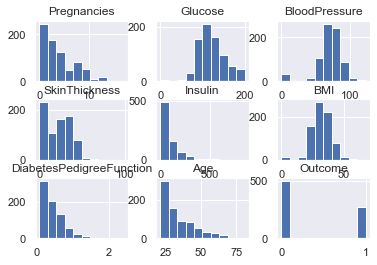

In [8]:
sns.set()
df.hist()
plt.show()

## EDA & Engineering
* 이상치 데이터 : 0 
* 왜도(skew) : 정규분포화, 표준화

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [11]:
#df[Glucose==0][Glucose]
print(df[df['Glucose']==0]['Glucose'].count(), df[df['Glucose']!=0]['Glucose'].count())

5 763


In [12]:
for COL in zero_cols:
    print(COL, df[df[COL]==0][COL].count()/df.shape[0]*100, df[df[COL]!=0][COL].count()/df.shape[0]*100)
    

Glucose 0.6510416666666667 99.34895833333334
BloodPressure 4.557291666666666 95.44270833333334
SkinThickness 29.557291666666668 70.44270833333334
Insulin 48.69791666666667 51.302083333333336
BMI 1.4322916666666665 98.56770833333334


####  zero_cols : (0/1   &  나이구간별) 평균 --> 0 채우기

In [13]:
df['BloodPressure'].mean()

69.10546875

In [14]:
df['Age'].describe() 

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [15]:
df['Age'].describe() 
#min : 21 ~ max : 81   --> 20 30 40 50 60 70 80 
# df['Age_band'] = df['Age']//20

df['Age_band'] = pd.cut(df['Age'], bins=[0,20,24,29,41,82,150],labels=[0,1,2,3,4,5] )
df[['Age','Age_band']].head() 
df['Age_band'].unique()

[4, 3, 1, 2]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [16]:
# select Age_band, avg(BloodPressure) from emp group by Age_band;
# df[조건].groupby()[컬럼]  Glucose
df[df['BloodPressure']>0].groupby(['Outcome','Age_band'])['BloodPressure'].mean()

Outcome  Age_band
0        0                 NaN
         1           66.839779
         2           70.203390
         3           73.574257
         4           77.518519
         5                 NaN
1        0                 NaN
         1           71.586207
         2           71.250000
         3           74.149425
         4           79.931818
         5                 NaN
Name: BloodPressure, dtype: float64

In [17]:
for COL in zero_cols:
    print(COL,  df[df[COL]>0].groupby(['Outcome','Age_band'])[COL].mean())
    print("---"*10)

Glucose Outcome  Age_band
0        0                  NaN
         1           107.594595
         2           107.451613
         3           113.133333
         4           119.060241
         5                  NaN
1        0                  NaN
         1           141.064516
         2           140.396226
         3           143.430108
         4           142.741573
         5                  NaN
Name: Glucose, dtype: float64
------------------------------
BloodPressure Outcome  Age_band
0        0                 NaN
         1           66.839779
         2           70.203390
         3           73.574257
         4           77.518519
         5                 NaN
1        0                 NaN
         1           71.586207
         2           71.250000
         3           74.149425
         4           79.931818
         5                 NaN
Name: BloodPressure, dtype: float64
------------------------------
SkinThickness Outcome  Age_band
0        0                

### 이상값(0) 채우기
* Insulin        : Outcome  Age_band
* BloodPressure  : Outcome  Age_band
* Glucose        : Outcome  Age_band
---
* BMI           : Outcome
* SkinThickness : Outcome



In [18]:
df[zero_cols] = df[zero_cols].replace(0, np.nan)
# df.fillna(  df[zero_cols].transpose( _____ )   )
# df.isna().sum()

In [19]:
df["Insulin"]       = df["Insulin"].fillna(df.groupby(by=["Outcome","Age_band"])["Insulin"].transform('mean'))
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby(by=["Outcome","Age_band"])["BloodPressure"].transform('mean'))
df["Glucose"]       = df["Glucose"].fillna(df.groupby(by=["Outcome","Age_band"])["Glucose"].transform('mean'))

df["BMI"]           = df["BMI"].fillna(df.groupby(by="Outcome")["BMI"].transform('mean'))
df["SkinThickness"] = df["SkinThickness"].fillna(df.groupby(by="Outcome")["SkinThickness"].transform('mean'))

In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_band                    0
dtype: int64

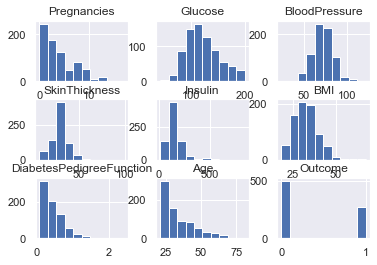

In [21]:
df.hist()
plt.show()

## 2차 점수 확인 : 스케일링

In [22]:
정답지 = df['Outcome']
문제지 = df.drop('Outcome', axis=1)
split_fit_score(문제지,정답지,model)  #0.8441558441558441

정확도0.8442 정밀도:0.8039 재현률:0.7455 f1:0.7736
오차행렬
 [[89 10]
 [14 41]]


## 스케일링 : 정규화, 단위맞추기

In [23]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [24]:
# mm = StandardScaler()
# mm.fit(문제지)                       #비율계산
# scaler_문제지 = mm.transform(문제지)  #계산반영해
# split_fit_score(scaler_문제지, 정답지, model)   #0.8441558441558441

scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]
for mm in scalers:
    mm.fit(문제지)                       #비율계산
    scaler_문제지 = mm.transform(문제지)  #계산반영해
    print(mm.__class__.__name__)
    split_fit_score(scaler_문제지, 정답지, model)   #0.8441558441558441    

MinMaxScaler
정확도0.8442 정밀도:0.8039 재현률:0.7455 f1:0.7736
오차행렬
 [[89 10]
 [14 41]]
RobustScaler
정확도0.8442 정밀도:0.8039 재현률:0.7455 f1:0.7736
오차행렬
 [[89 10]
 [14 41]]
StandardScaler
정확도0.8442 정밀도:0.8039 재현률:0.7455 f1:0.7736
오차행렬
 [[89 10]
 [14 41]]


## 3차 점수 확인 : 모델변경

## 모델 변경 : Boost 계열

In [25]:
# !pip install xgboost
# !pip install lightgbm

In [26]:
import xgboost as xgb
# import lightgbm

In [27]:
xgmodel = xgb.XGBClassifier(n_estimators=300, objective="binary:logistic")   #logloss
split_fit_score(scaler_문제지, 정답지, xgmodel)   
# 0.8441558441558441    
# 0.8571428571428571
# 0.8636363636363636


[15:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도0.8636 정밀도:0.8269 재현률:0.7818 f1:0.8037
오차행렬
 [[90  9]
 [12 43]]


## 검증
* 교차 검증(cross_val_score) : 데이터 N배 증강시켜 순차적 학습, (점수)
* 폴드(KFold, StratifiedKFold)  : 데이터 N배 증강시켜 순차적 학습, (점수,과정)
* 그리드서치(GridSearch)***   : 데이터 N배 증강시켜 순차적 학습,  (점수, 과정, 모델튜닝)

In [28]:
from sklearn.model_selection import KFold, StratifiedKFold

total_score = []

# kfold = KFold(n_splits=5, random_state=1414, shuffle=True)
# for train_index, test_index in kfold.split(문제지):

skfold = StratifiedKFold(n_splits=5, random_state=1414, shuffle=True)
for train_index, test_index in skfold.split(문제지, 정답지):
    문제지8, 문제지2 = 문제지.iloc[train_index], 문제지.iloc[test_index]
    정답지8, 정답지2 = 정답지.iloc[train_index], 정답지.iloc[test_index]
   #train_test_split(문제지,정답지, test_sizse=0.2, random_state=1414, shuffle=False) ----
    model.fit(문제지8, 정답지8)
    컴퓨터답2 = model.predict(문제지2)
    score = accuracy_score(정답지2, 컴퓨터답2)
    print("fold accuracy:", score)  
    total_score.append(score)
    ####return np.array(total_score)

print("평균", sum(total_score) / len(total_score))
print("평균", np.array(total_score).mean())  #평균 0.8658772599949071

fold accuracy: 0.9155844155844156
fold accuracy: 0.8961038961038961
fold accuracy: 0.8246753246753247
fold accuracy: 0.8300653594771242
fold accuracy: 0.8431372549019608
평균 0.8619132501485444
평균 0.8619132501485444


#### <font color=red> [참고] XGBoost로 CV할 경우 : sklean의 estimator가 아니기 때문에 다음과 같이 사용 </font>  

* ref : https://rdrr.io/cran/xgboost/man/xgb.cv.html
* 2020.09.27 기준 : https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/

In [29]:
dmatrix_df = xgb.DMatrix(data=문제지, label=정답지, enable_categorical=True)
xgb_cv_res = xgb.cv(dtrain=dmatrix_df, 
               params={"n_estimators": 300, "objective":"binary:logistic"}, 
               nfold=5, 
               metrics="auc",        #--- 이진분류 점수 중 하나 
               as_pandas=True)
xgb_cv_res['train-auc-mean'].mean()  #------------ 이거 accuracy 점수 아님......

[15:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used

0.98530564

In [30]:
from sklearn.model_selection import cross_val_score
#scores : ndarray  ::: 위와상동 == np.array(total_score)
total_score = cross_val_score(model, 문제지, 정답지, scoring='accuracy', cv=5)  #n_splits=cv=5
print(total_score)  #평균 0.8658772599949071
print("cross_val_score 평균:", total_score.mean())  #평균 0.867

[0.87012987 0.85064935 0.88311688 0.88235294 0.8496732 ]
cross_val_score 평균: 0.8671844495373907
